<a href="https://colab.research.google.com/github/manukrmanu/machine-learning/blob/main/credit_all3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Credit Score.csv')
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35,Female,75000.0,Doctorate,Married,1,Owned,High
3,40,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45,Female,100000.0,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500.0,High School Diploma,Single,0,Rented,Low
160,34,Male,47500.0,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500.0,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500.0,Master's Degree,Single,0,Owned,High


In [ ]:
df.isna().sum()

Age                   0
Gender                6
Income                9
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [ ]:
x=df['Gender'].mode()[0]
df['Gender'].fillna(x,inplace=True)
y=df['Income'].mode()[0]
df['Income'].fillna(y,inplace=True)
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Gender']=lab.fit_transform(df['Gender'])
df['Education']=lab.fit_transform(df['Education'])
df['Marital Status']=lab.fit_transform(df['Marital Status'])
df['Home Ownership']=lab.fit_transform(df['Home Ownership'])
df['Credit Score']=lab.fit_transform(df['Credit Score'])
df.dtypes

Age                     int64
Gender                  int64
Income                float64
Education               int64
Marital Status          int64
Number of Children      int64
Home Ownership          int64
Credit Score            int64
dtype: object

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=GaussianNB()
s_model=SVC()
lst=[k_model,n_model,s_model]
mdl=[KNeighborsClassifier,GaussianNB,SVC]
label=['low','average','high']

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> model
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.94      0.94      0.94        32
           2       1.00      0.57      0.73         7

    accuracy                           0.86        50
   macro avg       0.86      0.78      0.79        50
weighted avg       0.88      0.86      0.86        50

[[ 9  2  0]
 [ 2 30  0]
 [ 3  0  4]]

<class 'sklearn.naive_bayes.GaussianNB'> model
              precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.94      0.97      0.95        32
           2       0.58      1.00      0.74         7

    accuracy                           0.84        50
   macro avg       0.77      0.78      0.73        50
weighted avg       0.86      0.84      0.82        50

[[ 4  2  5]
 [ 1 31  0]
 [ 0  0  7]]

<class 'sklearn.svm._classes.SVC'> model
   

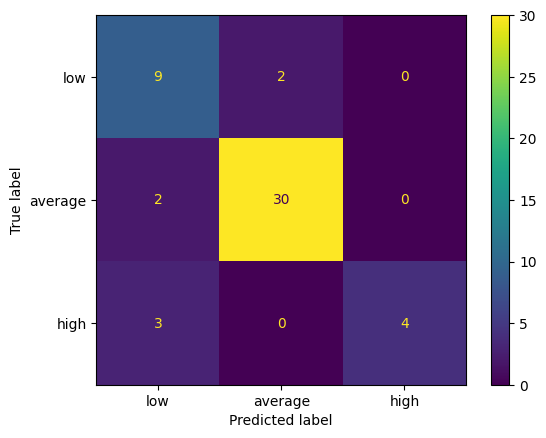

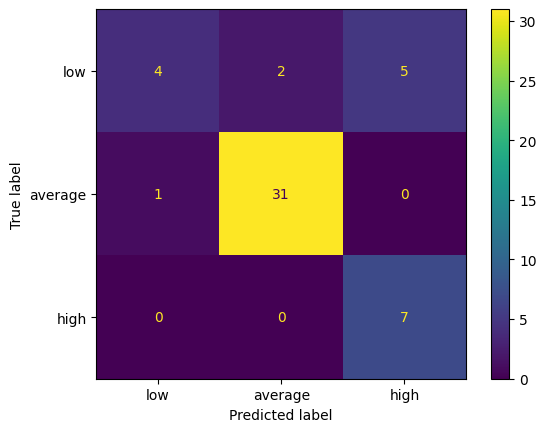

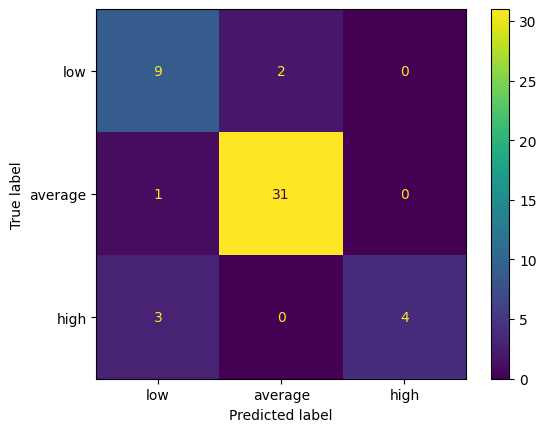

In [ ]:
j=0
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  mat=confusion_matrix(y_test,y_pred)
  print(mdl[j],'model')
  print(classification_report(y_test,y_pred))
  print(mat)
  dis=ConfusionMatrixDisplay(mat,display_labels=label)
  dis.plot()
  print()
  j+=1